In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [2]:
heros_full_features = pd.read_csv('dataset.csv')

# First: Separate the categorical from the boolean data


In [3]:
# Preprocessing
heros_nominal_information = heros_full_features.iloc[:, 2:11]
heros_boolean_information = heros_full_features.iloc[:, 11:]
heros_numerical_information = heros_full_features.loc[:, ['Height', 'Weight']]

In [4]:
# Remove Skin color, cause it is not good for the decision, then separete height and weight from the nominal atributes
heros_nominal_information = heros_nominal_information.drop(['Skin color', 'Height', 'Weight'], axis=1)

In [5]:
# Treat the missing numerical values giving then the mean of the others
imp = SimpleImputer(missing_values=-99, strategy='mean')
heros_numerical_information['Height'] = imp.fit_transform(np.array(heros_numerical_information['Height']).reshape(-1, 1))
heros_numerical_information['Weight'] = imp.fit_transform(np.array(heros_numerical_information['Weight']).reshape(-1, 1))

In [6]:
# Treat the missing nominal values giving then the most frequent of the others 
imp = SimpleImputer(missing_values='-', strategy='most_frequent')
# Labeling the nominal attributes 
le = preprocessing.LabelEncoder()
# All of this in the same loop

for index, item in heros_nominal_information.iteritems():
    heros_nominal_information.loc[:, index] = imp.fit_transform(np.array(heros_nominal_information.loc[:, index]).reshape(-1, 1))
    heros_nominal_information.loc[:, index] = le.fit_transform(heros_nominal_information.loc[:, index].astype(str))

In [7]:
# Discretize numerical attributes
#est = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
#heros_numerical_information = est.fit(heros_numerical_information)

In [8]:
pre_processed_dataset = pd.concat([heros_nominal_information, heros_boolean_information, heros_numerical_information], axis=1)

In [9]:
pre_processed_dataset.head()

,Gender,Eye color,Race,Hair color,Publisher,Alignment,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Height,Weight
0,1,18,22,14,11,1,False,True,False,False,...,False,False,False,False,False,False,False,False,203.000000,441.000000
1,1,2,31,14,2,1,True,True,False,False,...,False,False,False,False,False,False,False,False,191.000000,65.000000
2,1,2,53,14,1,1,False,False,True,False,...,False,False,False,False,False,False,False,False,185.000000,90.000000
3,1,7,26,14,11,0,False,True,False,False,...,False,False,False,False,False,False,False,False,203.000000,441.000000
4,1,2,10,1,11,0,False,False,False,True,...,False,False,False,False,False,False,False,False,187.237755,113.651709


In [65]:
# For Super Strength
target = pre_processed_dataset.loc[:, 'Super Strength']
x_train, x_test, y_train, y_test = train_test_split(pre_processed_dataset.drop(['Super Strength'], axis=1), target, test_size = 0.25, random_state = 42)

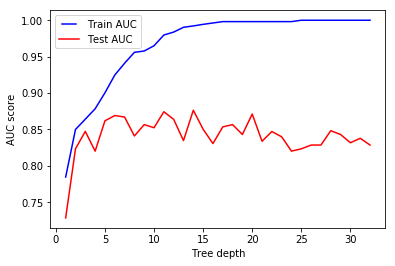

In [66]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [81]:
tree_classifier = DecisionTreeClassifier(random_state = 0, max_depth = 25)
tree_classifier.fit(x_train, y_train)

# Filling all the NaN occurences, with the set mean
print('Accuracy on the train subset: ' + str(tree_classifier.score(x_train, y_train)))
print('Accuracy on the test subset: ' + str(tree_classifier.score(x_test, y_test)))

Accuracy on the train subset: 1.0
Accuracy on the test subset: 0.8242424242424242


In [75]:
depth = []
for i in range(3,33):
    clf = DecisionTreeClassifier(max_depth=i, random_state = 0)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=pre_processed_dataset.drop(['Super Strength'], axis=1), y=target, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.8485439748995), (4, 0.8516478223699263), (5, 0.8319216022210639), (6, 0.8424315765391517), (7, 0.8258262333940548), (8, 0.821395630462567), (9, 0.8167873355316912), (10, 0.819714179064683), (11, 0.8212662748153845), (12, 0.8152842641951482), (13, 0.8136181221757208), (14, 0.8228833924206536), (15, 0.8272976538807554), (16, 0.8090908465398224), (17, 0.8107236175545246), (18, 0.810674937171343), (19, 0.812211723543588), (20, 0.8121470457199967), (21, 0.8046282487275155), (22, 0.8061966859496029), (23, 0.8001169705320267), (24, 0.801620729930523), (25, 0.8016854077541142), (26, 0.8062613637731941), (27, 0.8061643470378074), (28, 0.8046929265511068), (29, 0.8031568282408149), (30, 0.8031568282408149), (31, 0.8031568282408149), (32, 0.8031568282408149)]
